0 loss: 0.21577029
1 loss: 0.09571299
2 loss: 0.05743523
3 loss: 0.04510303
4 loss: 0.041010257
5 loss: 0.039541416
6 loss: 0.038915142
7 loss: 0.038565885
8 loss: 0.0383137
9 loss: 0.038100973
10 loss: 0.037908897
11 loss: 0.037731018
12 loss: 0.0375648
13 loss: 0.037409015
14 loss: 0.037262853
15 loss: 0.037125684
16 loss: 0.03699693
17 loss: 0.036876068
18 loss: 0.036762614
19 loss: 0.03665612
20 loss: 0.036556147
21 loss: 0.03646232
22 loss: 0.036374226
23 loss: 0.036291536
24 loss: 0.03621392
25 loss: 0.03614106
26 loss: 0.03607267
27 loss: 0.036008466
28 loss: 0.035948202
29 loss: 0.03589163
Predicting


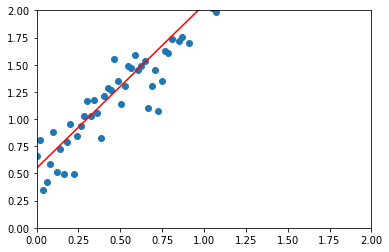

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def generate_dataset():
	x_batch = np.linspace(0, 2, 100)
	y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
	return x_batch, y_batch

def linear_regression():
	x = tf.placeholder(tf.float32, shape=(None, ), name='x')
	y = tf.placeholder(tf.float32, shape=(None, ), name='y')

	with tf.variable_scope('lreg') as scope:
		w = tf.Variable(np.random.normal(), name='W')
		b = tf.Variable(np.random.normal(), name='b')
		
		y_pred = tf.add(tf.multiply(w, x), b)

		loss = tf.reduce_mean(tf.square(y_pred - y))

	return x, y, y_pred, loss

def run():
	x_batch, y_batch = generate_dataset()

	x, y, y_pred, loss = linear_regression()

	optimizer = tf.train.GradientDescentOptimizer(0.1)
	train_op = optimizer.minimize(loss)

	with tf.Session() as session:
		session.run(tf.global_variables_initializer())

		feed_dict = {x: x_batch, y: y_batch}
		
		for i in range(30):
			_ = session.run(train_op, feed_dict)
			print(i, "loss:", loss.eval(feed_dict))

		print('Predicting')
		y_pred_batch = session.run(y_pred, {x : x_batch})

	plt.scatter(x_batch, y_batch)
	plt.plot(x_batch, y_pred_batch, color='red')
	plt.xlim(0, 2)
	plt.ylim(0, 2)
	plt.savefig('plot.png')

if __name__ == "__main__":
	run()